Calculate the adsorption energy using OCP models and checkopoints
==================================================
<div style="background-color: #DFF0D8; color: #4F8A10; padding: 10px">
    <strong>Note:</strong> It seems some of the checkpoints and models reveal the total ground state energy while others reveal the binding energy, I will check out which is which and update the notebook accordingly
</div>

Let's use eSCN which is is currently the state of the art model [`arXiv`](https://arxiv.org/abs/2302.03655)

In [2]:
%run related_scripts.ipynb

Return the root directory of the installed ocp package.
ocp_root
/home/ubuntu/github/install_ocp/ocp
Return the path to ocp main.py
ocp_main
/home/ubuntu/github/install_ocp/ocp/main.py
/home/ubuntu/.pyenv/versions/miniconda3-latest/envs/ocp-models/bin/python 3.9.17 | packaged by conda-forge | (main, Aug 10 2023, 07:02:31) 
[GCC 12.3.0]
ocp is installed at /home/ubuntu/github/install_ocp/ocp
ocp repo is at git commit: 77c3e88
numba: 0.57.1
numpy: 1.24.4
ase: 3.22.1
e3nn: 0.4.4
pymatgen: 2023.5.10
torch: 1.13.1
torch.version.cuda: 11.6
torch.cuda: is_available: True
  __CUDNN VERSION: 8302
  __Number CUDA Devices: 1
  __CUDA Device Name: NVIDIA A10G
  __CUDA Device Total Memory [GB]: 23.659937792
torch geometric: 2.2.0

Platform: Linux-5.15.0-1040-aws-x86_64-with-glibc2.31
  Processor: x86_64
  Virtual memory: svmem(total=66698514432, available=63525437440, percent=4.8, used=2421415936, free=34418020352, active=2870857728, inactive=27323650048, buffers=446259200, cached=29412818944, shar

In [15]:
from ocpmodels.common.relaxation.ase_utils import OCPCalculator
from ase.build import fcc111, add_adsorbate
from ase.optimize import BFGS

import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms

In [3]:
checkpoint = get_checkpoint('eSCN-L6-M3-Lay20 All+MD')

In [5]:
#load checkpoints to OCPcalculator
calc = OCPCalculator(checkpoint=os.path.expanduser(checkpoint), cpu=False)

In [12]:
#build a slab and adsorbate using ASE
E_form_H2O = -3.03 #eV H2O formation energy

In [9]:
slab = fcc111('Pt', size=(2, 2, 5), vacuum=10.0)
add_adsorbate(slab, 'O', height=1.2, position='fcc')

In [10]:
slab.set_calculator(calc)
opt = BFGS(slab)
opt.run(fmax=0.05, steps=100)

      Step     Time          Energy         fmax
BFGS:    0 16:35:03        1.754407        1.6820
BFGS:    1 16:35:03        1.535585        0.9740
BFGS:    2 16:35:03        1.319582        0.7250
BFGS:    3 16:35:03        1.249891        0.7994
BFGS:    4 16:35:04        0.861812        0.6839
BFGS:    5 16:35:04        0.808063        0.4946
BFGS:    6 16:35:04        0.776175        0.6195
BFGS:    7 16:35:04        0.764783        0.7335
BFGS:    8 16:35:04        0.746733        0.4927
BFGS:    9 16:35:05        0.733674        0.1279
BFGS:   10 16:35:05        0.728152        0.0332


True

In [14]:
slab_e = slab.get_potential_energy()
E_binding = slab_e + E_form_H2O
print('E_binding = ', E_binding)

E_binding =  -2.3018482613563536


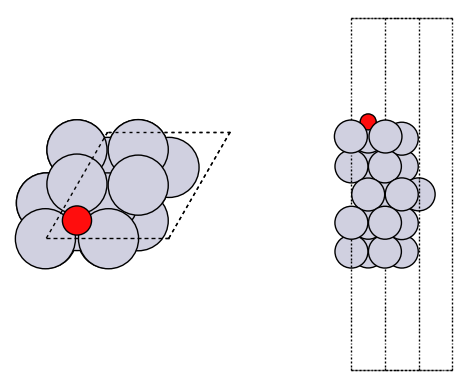

In [16]:
#visualize the structures
fig, axs = plt.subplots(1, 2)
plot_atoms(slab, axs[0]);
plot_atoms(slab, axs[1], rotation=('-90x'))
axs[0].set_axis_off()
axs[1].set_axis_off()